# Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, cross_val_score , StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
!pip install xgboost
import xgboost
from xgboost import XGBClassifier


# Reading the data

In [2]:
df = pd.read_csv("breastcancer.csv")

In [3]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# Dropping unecessary columns

In [5]:
df['Unnamed: 32'].unique()

array([nan])

In [6]:
df = df.drop(columns = ["id" ,"Unnamed: 32"], axis = 1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

# Encoding target variable

In [8]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [9]:
le = LabelEncoder()
df["diagnosis"] = le.fit_transform(df.diagnosis)

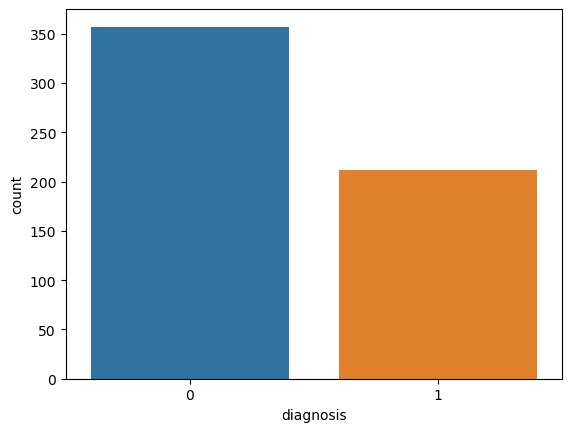

In [10]:
sns.countplot(data = df, x = 'diagnosis')
plt.rcParams["figure.figsize"] = (1,1)

In [11]:
df.duplicated().unique()

array([False])

# Visualizing correlations among different features

<AxesSubplot:>

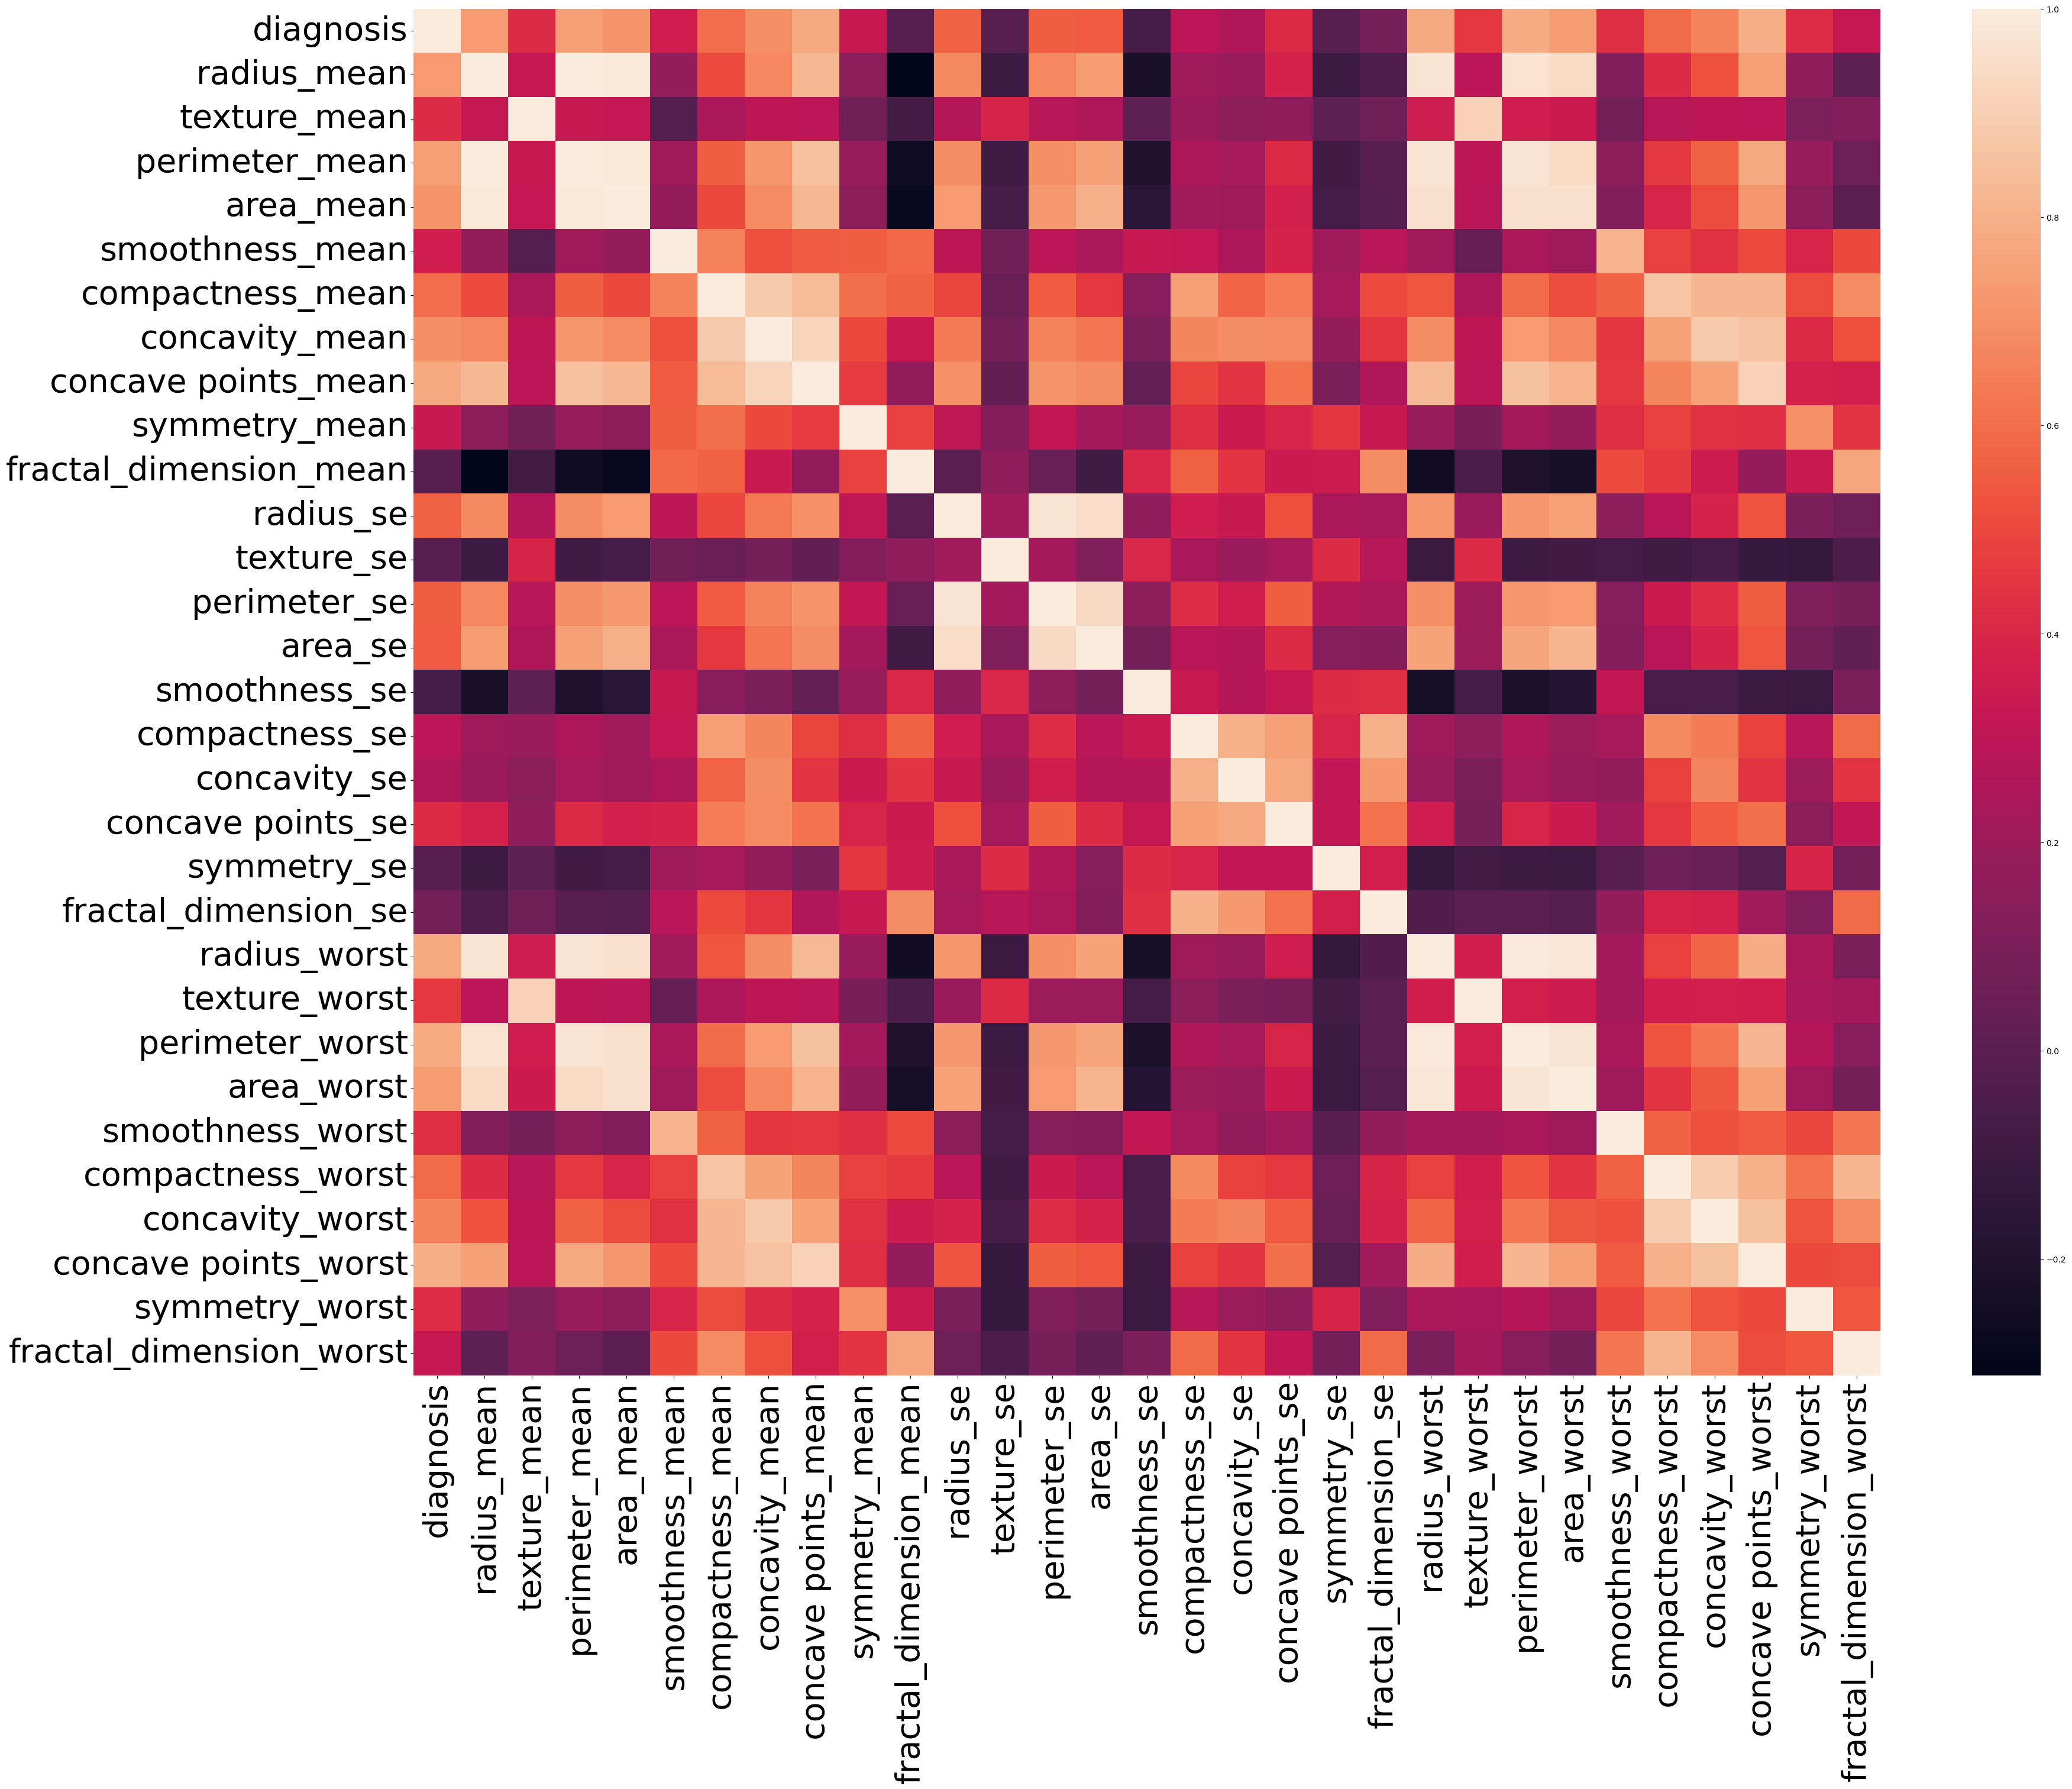

In [12]:
plt.rcParams["figure.figsize"] = (40,30)
plt.xticks(fontsize = 40)
plt.yticks(fontsize = 40)
sns.heatmap(df.corr())


In [13]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

# Dropping the columns which have low impact on target variable

In [14]:
df = df.drop(columns = ['fractal_dimension_mean','texture_se','smoothness_se','fractal_dimension_se','smoothness_worst','symmetry_worst','symmetry_se','smoothness_mean','symmetry_mean','compactness_se','concavity_se','fractal_dimension_worst'], axis = 1)

In [15]:
df.shape

(569, 19)

In [16]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'radius_se', 'perimeter_se', 'area_se',
       'concave points_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
       'area_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst'],
      dtype='object')

# Splitting the data into train and test

In [17]:
x = df.drop(columns = ['diagnosis'], axis = 1)
y = df.diagnosis

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2 ,  random_state = 5)

In [19]:
x_train.shape,y_train.shape

((455, 18), (455,))

# Random Forest

In [20]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [21]:
train_predict = model.predict(x_train)

In [22]:
accuracy_score(train_predict, y_train)

1.0

In [23]:
test_predict = model.predict(x_test)

In [24]:
accuracy_score(test_predict, y_test)

0.9736842105263158

# Feature Importance

In [25]:
model.feature_importances_

array([0.02887444, 0.01673187, 0.04594484, 0.02827451, 0.00931594,
       0.03516784, 0.10912994, 0.01099895, 0.00672285, 0.03111692,
       0.00669833, 0.112175  , 0.02351031, 0.202413  , 0.09319852,
       0.01320847, 0.03284502, 0.19367326])

In [26]:
df1 = pd.DataFrame(model.feature_importances_
                   ,index = df.columns[1:], columns = ["Importances"]).sort_values(by = "Importances", ascending = False)

In [27]:
df1

,Importances
perimeter_worst,0.202413
concave points_worst,0.193673
radius_worst,0.112175
concave points_mean,0.109130
area_worst,0.093199
perimeter_mean,0.045945
concavity_mean,0.035168
concavity_worst,0.032845
area_se,0.031117
radius_mean,0.028874


In [28]:
col = df1.index
for i in range(1, len(col)):
     x_tr = pd.DataFrame(x_train, columns = df1.index[0:i])
     x_te = pd.DataFrame(x_test, columns = df1.index[0:i])
     model.fit(x_tr, y_train)
     print(i, accuracy_score(model.predict(x_te), y_test))

1 0.8947368421052632
2 0.9385964912280702
3 0.9473684210526315
4 0.956140350877193
5 0.956140350877193
6 0.956140350877193
7 0.9736842105263158
8 0.956140350877193
9 0.956140350877193
10 0.956140350877193
11 0.956140350877193
12 0.9736842105263158
13 0.9736842105263158
14 0.9736842105263158
15 0.9736842105263158
16 0.9736842105263158
17 0.9736842105263158


# SVC

In [29]:
model = SVC()
model.fit(x_train, y_train)
preds = model.predict(x_test)
print(accuracy_score(preds, y_test))

0.9385964912280702


# Ada Boost

In [30]:
model = AdaBoostClassifier()
model.fit(x_train, y_train)
preds = model.predict(x_test)
print(accuracy_score(preds, y_test))

0.956140350877193


# Gradient Boosting

model.fit(x_train, y_train)
preds = model.predict(x_test)
print(accuracy_score(preds, y_test))

# XGBoost

In [32]:
model = XGBClassifier()
model.fit(x_train, y_train)
preds = model.predict(x_test)
print(accuracy_score(preds, y_test))

0.9824561403508771


In [33]:
# considering top seventeen features based on feature importance
col = df1.index
for i in range(1, len(col)):
     x_tr = pd.DataFrame(x_train, columns = df1.index[0:i])
     x_te = pd.DataFrame(x_test, columns = df1.index[0:i])
     model.fit(x_tr, y_train)
     print(i, accuracy_score(model.predict(x_te), y_test))

1 0.8947368421052632
2 0.9298245614035088
3 0.9385964912280702
4 0.9298245614035088
5 0.9385964912280702
6 0.9473684210526315
7 0.9649122807017544
8 0.956140350877193
9 0.956140350877193
10 0.956140350877193
11 0.956140350877193
12 0.9736842105263158
13 0.9824561403508771
14 0.9824561403508771
15 0.9824561403508771
16 0.9824561403508771
17 0.9824561403508771


# Principal Component Analysis

In [34]:
# Principal component analysis
for i in range(1, 19):
     func = PCA(n_components = i)
     func.fit(x_train)
     pca_train = func.transform(x_train)
     model.fit(pca_train, y_train)
     pca_preds = func.transform(x_test)
     print(i, accuracy_score(model.predict(pca_preds), y_test))

1 0.868421052631579
2 0.9385964912280702
3 0.9385964912280702
4 0.9649122807017544
5 0.9824561403508771
6 0.9736842105263158
7 0.9736842105263158
8 0.9736842105263158
9 0.9736842105263158
10 0.9736842105263158
11 0.9736842105263158
12 0.9649122807017544
13 0.9736842105263158
14 0.9736842105263158
15 0.9736842105263158
16 0.9824561403508771
17 0.9824561403508771
18 0.9824561403508771


# Cross Validation

In [35]:
# cross validation
sf = StratifiedKFold(n_splits = 10)
cross_val_score(model, x, y,cv = sf,  scoring = "accuracy")

array([1.        , 0.9122807 , 0.94736842, 0.94736842, 1.        ,
       0.98245614, 0.9122807 , 0.98245614, 0.98245614, 0.96428571])

# Classification Report

In [44]:
print(classification_report(preds, y_test))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        68
           1       0.96      1.00      0.98        46

    accuracy                           0.98       114
   macro avg       0.98      0.99      0.98       114
weighted avg       0.98      0.98      0.98       114

